In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

## Set up Data for Language Model

In [3]:
path = Path('data/assignments')

In [4]:
path.ls()

[PosixPath('data/assignments/labeled_assignment_clauses.csv'),
 PosixPath('data/assignments/assignment_clauses.json')]

In [5]:
df = pd.read_json(path/'assignment_clauses.json')

In [7]:
pd.set_option('max_colwidth', -1)

In [8]:
df.head(5)

,snippet
0,"Neither this Agreement nor any of the rights, interests or obligations hereunder shall be assigned by any of the parties hereto (whether by operation of law or otherwise) without the prior written consent of the other parties. Subject to the preceding sentence, this Agreement will be binding upon, inure to the benefit of and be enforceable by the parties and their respective successors and assigns.\n"
1,"This Agreement will be binding upon and inure to the benefit of (a) the heirs, executors and legal representatives of Executive upon Executives death and (b) any successor of the Company. Any such successor of the Company will be deemed substituted for the Company under the terms of this Agreement for all purposes. For this purpose, successor means any person, firm, corporation or other business entity which at any time, whether by purchase, merger or otherwise, directly or indirectly acquires all or substantially all of the assets or business of the Company. None of the rights of Executive to receive any form of compensation payable pursuant to this Agreement may be assigned or transferred except by will or the laws of descent and distribution. Any other attempted assignment, transfer, conveyance or other disposition of Executives right to compensation or other benefits will be null and void.\n"
2,"The Company shall assign this Agreement and its rights and obligations hereunder in whole, but not in part, to any corporation or other entity with or into which the Company may hereafter merge or consolidate or to which the Company may transfer all or substantially all of its assets, if in any such case said corporation or other entity shall by operation of law or expressly in writing assume all obligations of the Company hereunder as fully as if it had been originally made a party hereto; the Company may not otherwise assign this Agreement or its rights and obligations hereunder. Executive may not assign or transfer this Agreement or any rights or obligations hereunder.\n"
3,"Neither this Agreement nor any right, remedy, obligation nor liability arising hereunder or by reason hereof shall be assignable by any party hereto without the prior written consent of the other party, and any attempt to assign any right, remedy, obligation or liability hereunder without such consent shall be void, except (a) an assignment, in the case of a Business Combination where such party is not the surviving entity, or a sale of substantially all of its assets, to the entity which is the survivor of such Business Combination or the purchaser in such sale and (b) as provided in Section 4.5.\n"
4,"The Company will have the right at all times to assign any of its rights or obligations under this Indenture to a direct or indirect wholly owned Subsidiary of the Company, provided that, in the event of any such assignment, the Company will remain liable for all such obligations. Subject to the foregoing, this Indenture is binding upon and inures to the benefit of the parties hereto and their respective successors and assigns. This Indenture may not otherwise be assigned by the parties hereto.\n"


In [9]:
df.count()

snippet    4435
dtype: int64

In [10]:
bs=24

In [16]:
data_lm = (TextList.from_df(df, path=path)                           
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm')

In [17]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [18]:
data_lm.show_batch()

idx,text
0,"xxbos xxmaj neither party hereto shall assign its rights or obligations hereunder , in whole or in part , without the prior written consent of the other party . \n xxbos xxmaj this xxmaj note shall be binding upon each party and its permitted successors and assigns . xxmaj this xxmaj note may not be assigned by xxmaj borrower . \n xxbos xxmaj assignor does hereby transfer , assign , grant , and convey to xxmaj assignee , its successors and assigns , all of the right , title and interest of xxmaj assignor in"
1,"any portion of its respective duties hereunder unless it continues to remain liable for the performance of its obligations hereunder . xxmaj no such assignment or obligation shall increase the burden on xxmaj seller or impose any duty on xxmaj seller to xxunk with or report to any transferee , and xxmaj seller may continue to look to xxmaj buyer for all purposes under this xxmaj agreement . \n xxbos xxmaj xxunk xxmaj systems hereby consents to the assignment of the xxunk xxmaj license and the xxmaj xxunk xxmaj license from xxmaj national to xxmaj"
2,". xxmaj it is understood and agreed that xxmaj porter xxmaj capital is not assuming any of the responsibilities or obligations of the xxmaj company under such xxmaj accounts xxmaj receivable , but that it is xxunk taking an assignment of the right to be paid on such xxmaj accounts xxmaj receivable which the xxmaj company has fulfilled in the ordinary course of its business operations . xxmaj commercial xxmaj financing xxmaj agreement \n xxbos xxmaj assignor hereby agrees to assign its entire right , title and interest in the xxmaj leases to xxmaj assignee"
3,"the xxmaj restrictive xxmaj covenants xxmaj agreement without requiring your consent ; provided , however , that an assignment that occurs after the termination of your employment will not xxunk in any manner the scope of the xxmaj restrictive xxmaj covenants xxmaj agreement . xxmaj as used herein , "" successor "" will mean any person , firm , corporation or other business entity that at any time , whether by purchase , merger or otherwise , directly or indirectly acquires all or substantially all of the assets or business of the xxmaj company ."
4,"under the xxmaj merger xxmaj agreement . \n xxbos xxmaj this xxmaj note may not be assigned without the prior express written consent of xxmaj maker , which may be withheld by xxmaj maker in xxmaj makers sole discretion . \n xxbos xxmaj this xxmaj agreement is binding on the parties and their successors and permitted assigns . \n xxbos xxmaj xxunk hereby conveys , sells , assigns , transfers , and delivers to xxunk , as the designee of xxmaj xxunk , all of xxmaj xxunk 's right , title and interest in and"
5,"this xxmaj agreement without xxup itc 's prior written consent . \n xxbos xxmaj seller shall not assign any of its rights or interest in this xxmaj agreement or any xxmaj order , or subcontract all or substantially all of its performance of this xxmaj agreement or any xxmaj order , without xxmaj boeing 's prior written consent , which shall not be unreasonably withheld , except that xxmaj boeing may withhold its consent to an assignment to a xxmaj xxunk xxmaj person ( as defined below ) for any reason and at its sole"
6,"and all security deposits or xxunk of rents relating thereto or arising therefrom ; ( c ) all plans , specifications , and engineering drawings of the xxup leased xxup property ; ( d ) all permits and licenses including , without limitation , all occupancy permits necessary for the occupancy and operation of the xxup leased xxup property as a commercial office building and related facility ; and ( e ) all material agreements ( xxup material xxup agreements ) relating to the leasing , ownership , operation , or maintenance of the xxup"
7,"foundation with documentation executed by the assignee or transferee that confirms its agreement to be bound by the terms and provisions of this xxmaj agreement . \n xxbos xxmaj effective as of the closing 

In [19]:
data_lm.vocab.itos[:30]

['xxunk',
 'xxpad',
 'xxmaj',
 'the',
 ',',
 'of',
 'and',
 'to',
 'or',
 '.',
 'this',
 'agreement',
 'any',
 'in',
 'xxbos',
 '\n ',
 'be',
 'xxup',
 'shall',
 'by',
 'may',
 'assign',
 'not',
 'rights',
 'consent',
 'its',
 ')',
 'without',
 'all',
 '(']

## Train Language Model

In [20]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


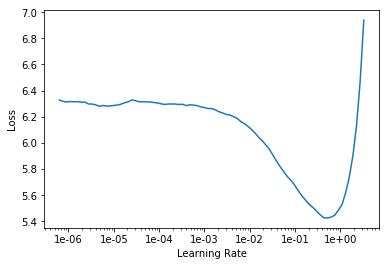

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

Total time: 00:09
epoch  train_loss  valid_loss  accuracy
1      3.254548    2.853068    0.420656  (00:09)



In [24]:
learn.save('k-assignments-1')

In [26]:
learn.predict('notwithstanding', 100, no_unk=True, temperature=1.1, min_p=0.001)

Total time: 00:04



'notwithstanding the term was of the " ( i i - the " this section 3 one of the " in the entire day of the period on behalf and the " any of xxup contract to the following the majority , along with up a member , as - their respective conditions if not less than during the media , that such third party , the following they of its corresponding , in return of the following a second trust to the extent , and reference to the " for a two the following the " vice hereon and after'

In [27]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

Total time: 00:09
epoch  train_loss  valid_loss  accuracy
1      3.138941    2.851676    0.420630  (00:09)



In [28]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

Total time: 00:09
epoch  train_loss  valid_loss  accuracy
1      3.162827    2.867443    0.418725  (00:09)



In [29]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

Total time: 00:09
epoch  train_loss  valid_loss  accuracy
1      3.148642    2.863177    0.420769  (00:09)



In [30]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

Total time: 00:09
epoch  train_loss  valid_loss  accuracy
1      3.131271    2.883626    0.416764  (00:09)



In [31]:
learn.load('k-assignments-1')

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (3992 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (3992 items)
[Text xxbos xxmaj neither this xxmaj agreement nor any of the rights , interests or obligations hereunder shall be assigned by any of the parties hereto ( whether by operation of law or otherwise ) without the prior written consent of the other parties . xxmaj subject to the preceding sentence , this xxmaj agreement will be binding upon , inure to the benefit of and be enforceable by the parties and their respective successors and assigns . 
 , Text xxbos xxmaj this xxmaj agreement will be binding upon and inure to the benefit of ( a ) the heirs , executors and legal representatives of xxmaj executive upon xxmaj executives death and ( b ) any successor of the xxmaj company . xxmaj any such successor of the xxmaj company will be deemed substituted for the xxmaj company under the terms of this xxmaj agreement for

In [32]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


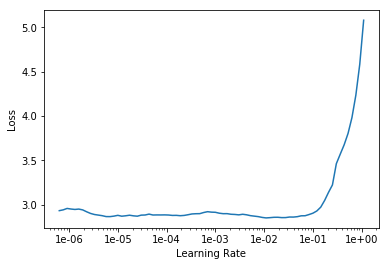

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      2.606138    2.470792    0.470432  (00:12)
2      2.170570    2.287044    0.502067  (00:12)



In [36]:
learn.save('k-assignments-2')

In [37]:
learn.save_encoder('k-assignments-2-enc')

In [38]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      2.179564    2.361124    0.486772  (00:12)
2      1.806149    2.241193    0.511683  (00:11)



In [39]:
learn.save('k-assignments-3')

In [40]:
learn.save_encoder('k-assignments-3-enc')

In [41]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      1.879713    2.321534    0.498011  (00:12)
2      1.495428    2.272219    0.517060  (00:11)



In [42]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      1.617301    2.349110    0.499111  (00:12)
2      1.251274    2.358005    0.514669  (00:11)



In [43]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      1.409118    2.420218    0.500794  (00:11)
2      1.083869    2.458496    0.510001  (00:12)



In [44]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      1.254049    2.498752    0.495656  (00:11)
2      0.958348    2.533711    0.507232  (00:12)



In [45]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      1.132203    2.538743    0.495808  (00:12)
2      0.840581    2.556821    0.510425  (00:12)



In [46]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      1.049114    2.585950    0.495436  (00:12)
2      0.768369    2.638693    0.505780  (00:12)



In [47]:
learn.load('k-assignments-3')

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (3992 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (3992 items)
[Text xxbos xxmaj neither this xxmaj agreement nor any of the rights , interests or obligations hereunder shall be assigned by any of the parties hereto ( whether by operation of law or otherwise ) without the prior written consent of the other parties . xxmaj subject to the preceding sentence , this xxmaj agreement will be binding upon , inure to the benefit of and be enforceable by the parties and their respective successors and assigns . 
 , Text xxbos xxmaj this xxmaj agreement will be binding upon and inure to the benefit of ( a ) the heirs , executors and legal representatives of xxmaj executive upon xxmaj executives death and ( b ) any successor of the xxmaj company . xxmaj any such successor of the xxmaj company will be deemed substituted for the xxmaj company under the terms of this xxmaj agreement for

In [48]:
learn.predict('notwithstanding', 100, no_unk=True, temperature=1.1, min_p=0.001)

Total time: 00:05



"notwithstanding anything else xxup llc or other than the xxmaj company , in the full title to xxmaj colorado and all of the terms and in the xxmaj employers and / s / s / s / s / s / s / s shall be subject to the xxmaj optionee is not less than the xxmaj agreement to the xxmaj medical to xxmaj canada may freely and / s / s / s / s / or a xxmaj mr. xxmaj management or any interest in whole or by a xxmaj united 's entire right , and its ownership of"

In [49]:
learn.predict('successors', 5)

Total time: 00:00



'successors or related parties have been'

In [50]:
learn.predict('notwithstanding', 5)

Total time: 00:00



'notwithstanding this agreement to the date'

In [51]:
learn.predict('except', 5)

Total time: 00:00



'except as of the xxmaj manager'

In [52]:
learn.predict('shall', 5)

Total time: 00:00



'shall have been duly executed by'

In [53]:
learn.predict('may', 5)

Total time: 00:00



'may assign and c. pursuant to'

In [54]:
learn.predict('consent', 5)

Total time: 00:00



'consent of such document as a'

## Classifier

In [57]:
labeled = pd.read_csv(path/'labeled_assignment_clauses.csv')

In [58]:
labeled.head(5)

,clause,"label (assignable, not, limited)"
0,"Assignment. Neither this Agreement nor any of the rights, interests or obligations hereunder shall be assigned by any of the parties hereto (whether by operation of law or otherwise) without the prior written consent of the other parties. Subject to the preceding sentence, this Agreement will be binding upon, inure to the benefit of and be enforceable by the parties and their respective successors and assigns.",not
1,"Assignment. This Agreement will be binding upon and inure to the benefit of (a) the heirs, executors and legal representatives of Executive upon Executives death and (b) any successor of the Company. Any such successor of the Company will be deemed substituted for the Company under the terms of this Agreement for all purposes. For this purpose, successor means any person, firm, corporation or other business entity which at any time, whether by purchase, merger or otherwise, directly or indirectly acquires all or substantially all of the assets or business of the Company. None of the rights of Executive to receive any form of compensation payable pursuant to this Agreement may be assigned or transferred except by will or the laws of descent and distribution. Any other attempted assignment, transfer, conveyance or other disposition of Executives right to compensation or other benefits will be null and void.",limited
2,"Assignment. The Company shall assign this Agreement and its rights and obligations hereunder in whole, but not in part, to any corporation or other entity with or into which the Company may hereafter merge or consolidate or to which the Company may transfer all or substantially all of its assets, if in any such case said corporation or other entity shall by operation of law or expressly in writing assume all obligations of the Company hereunder as fully as if it had been originally made a party hereto; the Company may not otherwise assign this Agreement or its rights and obligations hereunder. Executive may not assign or transfer this Agreement or any rights or obligations hereunder.",limited
3,"Assignment. Neither this Agreement nor any right, remedy, obligation nor liability arising hereunder or by reason hereof shall be assignable by any party hereto without the prior written consent of the other party, and any attempt to assign any right, remedy, obligation or liability hereunder without such consent shall be void, except (a) an assignment, in the case of a Business Combination where such party is not the surviving entity, or a sale of substantially all of its assets, to the entity which is the survivor of such Business Combination or the purchaser in such sale and (b) as provided in Section 4.5.",limited
4,"The Company will have the right at all times to assign any of its rights or obligations under this Indenture to a direct or indirect wholly owned Subsidiary of the Company, provided that, in the event of any such assignment, the Company will remain liable for all such obligations. Subject to the foregoing, this Indenture is binding upon and inures to the benefit of the parties hereto and their respective successors and assigns. This Indenture may not otherwise be assigned by the parties hereto.",limited


In [59]:
labeled.count()

clause                              99
label (assignable, not, limited)    99
dtype: int64

In [64]:
labeled.columns

Index(['clause', 'label (assignable, not, limited)'], dtype='object')

In [66]:
labeled['label (assignable, not, limited)'].value_counts()

not           51
limited       38
assignable    10
Name: label (assignable, not, limited), dtype: int64

### Create classification data bunch making sure to use the data_lm.vocab

In [72]:
data_clas = (TextDataBunch.from_csv(path, 'labeled_assignment_clauses.csv',
                              vocab=data_lm.vocab,
                              text_cols='clause',
                              label_cols='label (assignable, not, limited)',
                              valid_pct=0.2))

In [73]:
data_clas.save('tmp_clas')

In [74]:
data_clas.show_batch()

text,label
"xxbos xxunk 1 xxmaj assignment . xxmaj without the prior written consent of the other xxmaj party hereto ( which consent shall not be unreasonably withheld ) , a xxmaj party will not sell , transfer , assign , delegate , pledge or otherwise dispose of , whether voluntarily ,",limited
xxbos xxunk 1 xxmaj assignment . xxmaj neither party may assign its rights or obligations under this xxmaj agreement or designate another person ( i ) to perform all or part of its obligations under this xxmaj agreement or ( ii ) to have all or part of its rights,limited
"xxbos xxunk 1 xxmaj assignment . xxmaj this xxmaj agreement shall not be assignable , pledged or otherwise transferred , nor may any right or obligations hereunder be assigned , pledged or transferred , by either xxmaj party to any xxmaj third xxmaj party without the prior written consent of",limited
"xxbos xxunk 1 xxmaj assignment . xxmaj neither this xxmaj agreement nor any of the rights , interests or obligations hereunder shall be assigned , in whole or in part , by operation of xxmaj law or otherwise , by any xxmaj party or xxmaj abbott without the prior written",limited
"xxbos xxunk 1 xxmaj assignment . xxmaj neither this xxmaj agreement nor any of the rights , interests or obligations under this xxmaj agreement may be assigned or delegated , in whole or in part , by operation of law or otherwise , by either xxmaj party without the prior",limited


In [77]:
len(data_clas.train_ds)

79

In [78]:
len(data_clas.valid_ds)

20

In [79]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=bs)

In [80]:
data_clas.show_batch()

text,label
"xxbos xxunk 1 xxmaj assignment . xxmaj without the prior written consent of the other xxmaj party hereto ( which consent shall not be unreasonably withheld ) , a xxmaj party will not sell , transfer , assign , delegate , pledge or otherwise dispose of , whether voluntarily ,",limited
xxbos xxunk 1 xxmaj assignment . xxmaj neither party may assign its rights or obligations under this xxmaj agreement or designate another person ( i ) to perform all or part of its obligations under this xxmaj agreement or ( ii ) to have all or part of its rights,limited
"xxbos xxunk 1 xxmaj assignment . xxmaj this xxmaj agreement shall not be assignable , pledged or otherwise transferred , nor may any right or obligations hereunder be assigned , pledged or transferred , by either xxmaj party to any xxmaj third xxmaj party without the prior written consent of",limited


## Create classification learner using encodings from language model

In [81]:
learn_clas = text_classifier_learner(data_clas, drop_mult=0.5)
learn_clas.load_encoder('k-assignments-3-enc')
learn_clas.freeze()

In [82]:
learn_clas.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


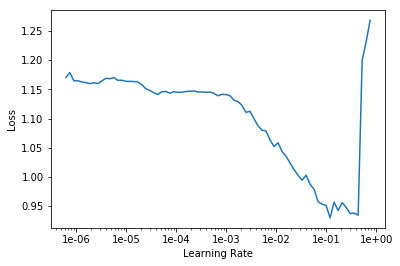

In [83]:
learn_clas.recorder.plot()

In [84]:
learn_clas.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

Total time: 00:00
epoch  train_loss  valid_loss  accuracy
1      1.117335    0.962024    0.550000  (00:00)



In [85]:
learn_clas.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

Total time: 00:00
epoch  train_loss  valid_loss  accuracy
1      0.863682    0.889964    0.550000  (00:00)



In [86]:
learn_clas.fit_one_cycle(10, 2e-2, moms=(0.8,0.7))

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.750925    0.885803    0.550000  (00:00)
2      0.705017    0.712875    0.550000  (00:00)
3      0.673255    0.552463    0.650000  (00:00)
4      0.645958    0.424406    0.800000  (00:00)
5      0.641136    0.369536    0.950000  (00:00)
6      0.612674    0.384684    0.950000  (00:00)
7      0.578768    0.334361    0.900000  (00:00)
8      0.548511    0.333385    0.850000  (00:00)
9      0.524189    0.316616    0.900000  (00:00)
10     0.491523    0.342186    0.950000  (00:00)



In [87]:
learn_clas.save('k-assignments-clas-1')

In [88]:
learn_clas.fit_one_cycle(5, 2e-2, moms=(0.8,0.7))

Total time: 00:01
epoch  train_loss  valid_loss  accuracy
1      0.423328    0.284812    0.950000  (00:00)
2      0.482873    0.458626    0.850000  (00:00)
3      0.449512    0.507270    0.800000  (00:00)
4      0.402734    0.594875    0.850000  (00:00)
5      0.398521    0.488334    0.950000  (00:00)



In [89]:
learn_clas.fit_one_cycle(10, 2e-2, moms=(0.8,0.7))

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.297256    0.434560    0.900000  (00:00)
2      0.316850    0.441521    0.850000  (00:00)
3      0.320266    0.418677    0.800000  (00:00)
4      0.331537    0.776778    0.700000  (00:00)
5      0.337376    0.616700    0.750000  (00:00)
6      0.376814    0.490091    0.850000  (00:00)
7      0.367764    0.640557    0.650000  (00:00)
8      0.366157    0.513066    0.850000  (00:00)
9      0.356059    0.486849    0.800000  (00:00)
10     0.357931    0.495188    0.800000  (00:00)



In [90]:
learn_clas.load('k-assignments-clas-1')

RNNLearner(data=TextClasDataBunch;
Train: LabelList
y: CategoryList (79 items)
[Category limited, Category not, Category assignable, Category limited, Category assignable]...
Path: .
x: TextList (79 items)
[Text xxbos xxunk 1 xxmaj assignment . xxmaj neither party shall assign its rights or obligations under this xxmaj agreement without the prior written consent of the other party , which shall not be unreasonably withheld or delayed ; provided , however , that a party may , without such consent , assign this xxmaj agreement and its rights and obligations hereunder ( a ) to any xxmaj affiliate , or ( b ) in connection with the transfer or sale of all or substantially all of its business to which this xxmaj agreement relates , or in the event of its merger , consolidation , change in control or similar transaction . xxmaj any permitted assignee shall assume all obligations of its assignor under this xxmaj agreement . xxmaj any purported assignment in violation of this xxmaj section 9.3 

In [91]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 00:00
epoch  train_loss  valid_loss  accuracy
1      0.396502    0.318292    0.950000  (00:00)



In [92]:
learn_clas.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 00:01
epoch  train_loss  valid_loss  accuracy
1      0.341132    0.352080    0.900000  (00:00)
2      0.426639    0.365588    0.950000  (00:00)
3      0.385002    0.355642    0.850000  (00:00)
4      0.364882    0.325212    0.850000  (00:00)
5      0.347971    0.328020    0.850000  (00:00)



In [95]:
learn_clas.load('k-assignments-clas-1')

RNNLearner(data=TextClasDataBunch;
Train: LabelList
y: CategoryList (79 items)
[Category limited, Category not, Category assignable, Category limited, Category assignable]...
Path: .
x: TextList (79 items)
[Text xxbos xxunk 1 xxmaj assignment . xxmaj neither party shall assign its rights or obligations under this xxmaj agreement without the prior written consent of the other party , which shall not be unreasonably withheld or delayed ; provided , however , that a party may , without such consent , assign this xxmaj agreement and its rights and obligations hereunder ( a ) to any xxmaj affiliate , or ( b ) in connection with the transfer or sale of all or substantially all of its business to which this xxmaj agreement relates , or in the event of its merger , consolidation , change in control or similar transaction . xxmaj any permitted assignee shall assume all obligations of its assignor under this xxmaj agreement . xxmaj any purported assignment in violation of this xxmaj section 9.3 

In [96]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 00:00
epoch  train_loss  valid_loss  accuracy
1      0.472404    0.279126    0.950000  (00:00)



In [97]:
learn_clas.save('k-assignments-clas-2')

In [98]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 00:00
epoch  train_loss  valid_loss  accuracy
1      0.353398    0.292837    0.900000  (00:00)



In [101]:
learn_clas.load('k-assignments-clas-2')

RNNLearner(data=TextClasDataBunch;
Train: LabelList
y: CategoryList (79 items)
[Category limited, Category not, Category assignable, Category limited, Category assignable]...
Path: .
x: TextList (79 items)
[Text xxbos xxunk 1 xxmaj assignment . xxmaj neither party shall assign its rights or obligations under this xxmaj agreement without the prior written consent of the other party , which shall not be unreasonably withheld or delayed ; provided , however , that a party may , without such consent , assign this xxmaj agreement and its rights and obligations hereunder ( a ) to any xxmaj affiliate , or ( b ) in connection with the transfer or sale of all or substantially all of its business to which this xxmaj agreement relates , or in the event of its merger , consolidation , change in control or similar transaction . xxmaj any permitted assignee shall assume all obligations of its assignor under this xxmaj agreement . xxmaj any purported assignment in violation of this xxmaj section 9.3 

In [102]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(3, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 00:01
epoch  train_loss  valid_loss  accuracy
1      0.417012    0.301098    0.950000  (00:00)
2      0.433203    0.281170    0.950000  (00:00)
3      0.376490    0.286115    1.000000  (00:00)



In [103]:
learn_clas.save('k-assignments-clas-3')

In [105]:
learn_clas.predict("The parties shall not assign this agreement.")

('not', tensor(1), tensor([0.0189, 0.9796, 0.0015]))

In [106]:
learn_clas.predict("The parties may assign this agreement.")

('not', tensor(1), tensor([0.1908, 0.7220, 0.0872]))

In [107]:
learn_clas.predict("The parties may assign this agreement provided such assignment is to an affiliate.")

('limited', tensor(0), tensor([0.5987, 0.2015, 0.1998]))

In [108]:
learn_clas.predict("Each party may assign this agreement.")

('not', tensor(1), tensor([0.2322, 0.7078, 0.0600]))

In [109]:
learn_clas.predict("Each party may assign this agreement to a related party.")

('limited', tensor(0), tensor([0.8222, 0.1484, 0.0294]))

In [110]:
learn_clas.predict("A party may only assign this agreement after receipt of written consent of the other party.")

('not', tensor(1), tensor([0.2585, 0.7014, 0.0401]))

In [112]:
learn_clas.predict("An assignment of this Agreement by operation of law, as a result of a merger, consolidation, amalgamation, or other transaction or series of transactions, requires consent to the same extent as would an assignment to the same assignee outside of such a transaction or series of transactions.")

('limited', tensor(0), tensor([0.7670, 0.2026, 0.0304]))

In [114]:
learn_clas.predict('Consent is not required for an assignment of this Agreement in connection with a sale or other disposition of substantially all the assets of the assigning party’s business.')

('limited', tensor(0), tensor([0.8266, 0.1512, 0.0222]))

In [117]:
learn_clas.predict('The parties may freely assign this agreement')

('not', tensor(1), tensor([0.1245, 0.8547, 0.0209]))

In [118]:
learn_clas.predict('Fred may only assign to Wilma.')

('limited', tensor(0), tensor([0.4589, 0.4327, 0.1084]))

In [122]:
data_clas.valid_ds.y.items

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1], dtype=object)

In [124]:
data_clas.valid_ds.y.classes

array(['limited', 'not', 'assignable'], dtype='<U10')

In [125]:
data_clas.valid_ds.y.items[12]

2

In [128]:
data_clas.valid_ds.x[12]

Text xxbos xxunk 1 xxmaj assignment . xxmaj this xxmaj warrant may be transferred or assigned , in whole or in part , at any time and from time to time by the then xxmaj holder by xxunk this xxmaj warrant to the xxmaj company together with a duly executed xxmaj assignment in substantially the form and substance of the xxmaj form of xxmaj assignment which xxunk this xxmaj warrant as xxmaj exhibit b hereto , and , upon the xxmaj company 's receipt thereof , and in any event , within five ( 5 ) business days thereafter , the xxmaj company shall issue a xxmaj warrant to the xxmaj holder to evidence that portion of this xxmaj warrant , if any as shall not have been so transferred or assigned .

In [130]:
learn_clas.predict(' This Warrant may be transferred or assigned, in whole or in part, at any time and from time to time by the then Holder by submitting this Warrant to the Company together with a duly executed Assignment in substantially the form and substance of the Form of Assignment which accompanies this Warrant as Exhibit B hereto, and, upon the Company\'s receipt thereof, and in any event, within five (5) business days thereafter, the Company shall issue a Warrant to the Holder to evidence that portion of this Warrant, if any as shall not have been so transferred or assigned.')

('assignable', tensor(2), tensor([0.0348, 0.0005, 0.9647]))

In [131]:
data_clas.valid_ds.y.items[16]

2

In [132]:
data_clas.valid_ds.x[16]

Text xxbos xxunk 1 xxmaj the xxmaj bank may sell or assign all or any portion of its rights and benefits hereunder and , in connection therewith , may deliver to such prospective buyer or assignee financial statements and other relevant information pertaining to the xxmaj debtor or any obligor on the xxmaj indebtedness .

In [139]:
learn_clas.predict('Bart may transfer to Lisa.')

('limited', tensor(0), tensor([0.5946, 0.2059, 0.1994]))

In [140]:
learn_clas.predict('Bart may not transfer.')

('not', tensor(1), tensor([0.0570, 0.9352, 0.0077]))